# Analyze key variables from the datasets through descriptive statistics

## Variables leveraged from unique Authors dataset (created especially for the analysis): 
### - multilingual
### - gender
### - nationality
### - number of JAFF books over total 

## Prepare Multilingual column

In [221]:
# Import file
file_authors = 'AUTHORS_UNIQUE_FINAL.csv'

df_multi = pd.read_csv(file_authors, delimiter=';')

df_multi.head()

,Author ID,Author name,average_rating,year_of_publication,Number of works,Multilingual,Man-woman,American,British,Of color,Other nationalities,URL_authors,Asian,Hispanic,White,Monolingual
0,1332,Julia Golding,0.00,NaN,85.0,x,w,NaN,x,NaN,NaN,https://www.goodreads.com/author/show/1332.Jul...,NaN,NaN,NaN,NaN
1,1448,Karen Joy Fowler,3.10,2004.0,148.0,NaN,w,x,NaN,NaN,NaN,https://www.goodreads.com/author/show/1448.Kar...,NaN,NaN,NaN,x
2,4738,Alexander McCall Smith,0.00,NaN,624.0,NaN,m,NaN,x,NaN,NaN,https://www.goodreads.com/author/show/4738.Ale...,NaN,NaN,NaN,x
3,4992,Cathy Williams,3.75,NaN,237.0,NaN,w,NaN,x,NaN,NaN,https://www.goodreads.com/author/show/4992.Cat...,NaN,NaN,NaN,x
4,5672,Val McDermid,3.85,NaN,356.0,NaN,w,NaN,x,NaN,NaN,https://www.goodreads.com/author/show/5672.Val...,NaN,NaN,NaN,x


In [188]:
# Category boolean vectors
is_multilingual = df_multi['Multilingual'] == 'x'
is_monolingual = (df_multi['Monolingual'] == 'x') & (~is_multilingual)
is_unknown = ~is_multilingual & ~(df_multi['Monolingual'] == 'x')

# Count how many multilingual and monolingual
multilingual_count = is_multilingual.sum()
monolingual_count = is_monolingual.sum()
unknown_count = is_unknown.sum()

print(f"Multilingual: {multilingual_count}")
print(f"Monolingual: {monolingual_count}")
print(f"Unknown: {unknown_count}")


Multilingual: 127
Monolingual: 638
Unknown: 1009


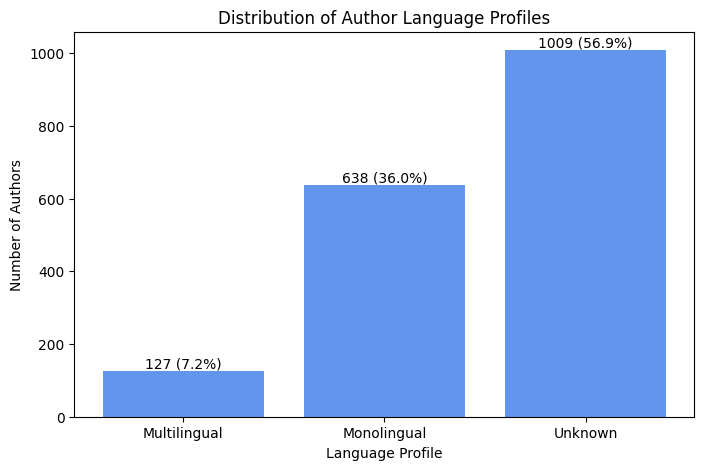

In [189]:
# Label the three categories
labels = ['Multilingual', 'Monolingual', 'Unknown']
sizes = [multilingual_count, monolingual_count, unknown_count]

# Create bar chart 
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, sizes, color='cornflowerblue')
plt.xlabel('Language Profile')
plt.ylabel('Number of Authors')
plt.title('Distribution of Author Language Profiles')

total = sum(sizes)
for idx, (bar, value) in enumerate(zip(bars, sizes)):
    pct = value / total * 100
    # Add count and percentage on top of the bars
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{value} ({pct:.1f}%)",
        ha='center', va='bottom'
    )
plt.show()

## Prepare Gender column

In [190]:
# Define function to convert gender markers (m,w) into categorical values, keeping track of non-identified profiles as well
# 0 = Man, 1 = Woman, 2 = Non-identified
def map_gender(val):
    if val == 'm':
        return 0  
    elif val == 'w':
        return 1  
    else:
        return 2  

df_multi['gender'] = df_multi['Man-woman'].apply(map_gender)
print(df_multi.head())

   Author ID             Author name  average_rating  year_of_publication  \
0       1332           Julia Golding            0.00                  NaN   
1       1448        Karen Joy Fowler            3.10               2004.0   
2       4738  Alexander McCall Smith            0.00                  NaN   
3       4992          Cathy Williams            3.75                  NaN   
4       5672            Val McDermid            3.85                  NaN   

   Number of works Multilingual Man-woman American British Of color  \
0             85.0            x         w      NaN       x      NaN   
1            148.0          NaN         w        x     NaN      NaN   
2            624.0          NaN         m      NaN       x      NaN   
3            237.0          NaN         w      NaN       x      NaN   
4            356.0          NaN         w      NaN       x      NaN   

  Other nationalities                                        URL_authors  \
0                 NaN  https://www

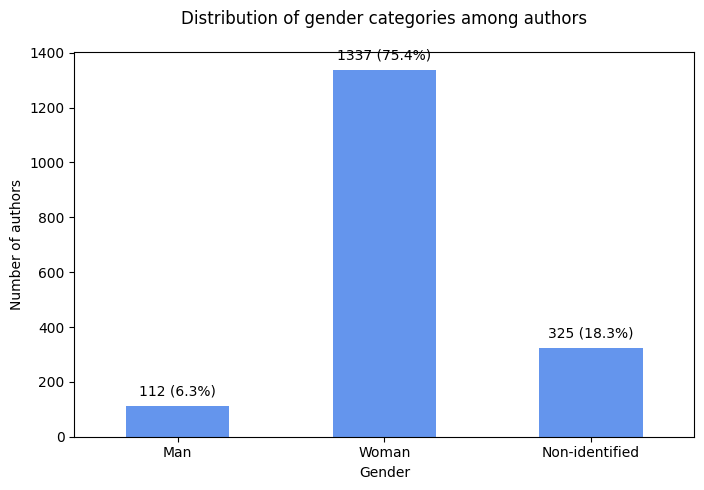

In [191]:
labels = {0: 'Man', 1: 'Woman', 2: 'Non-identified'}
counts = df_multi['gender'].value_counts().sort_index()
counts.index = [labels[x] for x in counts.index]
total = counts.sum()

plt.figure(figsize=(8, 5))
ax = counts.plot(kind='bar', color='cornflowerblue')
plt.ylabel('Number of authors')
plt.xlabel('Gender')
plt.title('Distribution of gender categories among authors', pad=20)
plt.xticks(rotation=0)

# Add value + percentage on each bar
for i, v in enumerate(counts):
    perc = v / total * 100
    ax.text(i, v + max(counts)*0.02, f'{int(v)} ({perc:.1f}%)', 
            ha='center', va='bottom') 
plt.show()


## Prepare Nationality column

In [216]:
# Define function to convert nationality markers into a categorical value: 0 = American, 1 = British, 2 = Other
# 0 = American, 1 = British, 2 = Other, 3 = Unknown
def map_nationality(row):
    if row['American'] == 'x':
        return 0
    elif row['British'] == 'x':
        return 1
    elif row['Other nationalities'] == 'x':
        return 2
    else:
        return 3

df_multi['american/british/other/unknown'] = df_multi.apply(map_nationality, axis=1)

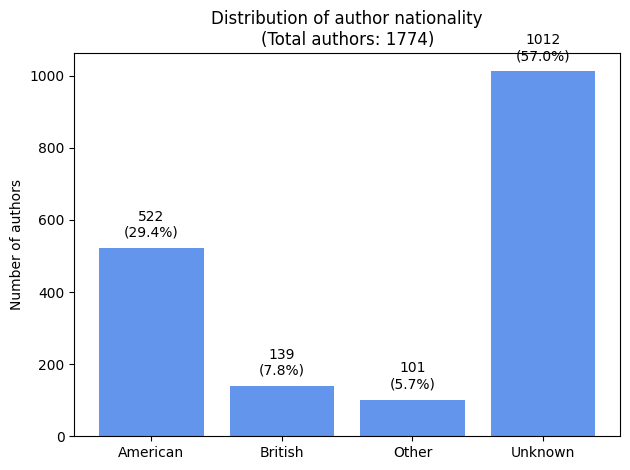

In [217]:
labels = {0: 'American', 1: 'British', 2: 'Other', 3: 'Unknown'}
counts = df_multi['american/british/other/unknown'].value_counts().sort_index()
counts.index = [labels[x] for x in counts.index]
total = counts.sum()

fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts, color='cornflowerblue')

# Add values and percentages on each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    percent = count / total * 100
    ax.annotate(f'{int(count)}\n({percent:.1f}%)',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 6),
                textcoords="offset points",
                ha='center', va='bottom')

plt.title(f'Distribution of author nationality\n(Total authors: {total})')
plt.ylabel('Number of authors')
plt.tight_layout()
plt.show()

## Prepare data for counting JAFF books over total

Import regular authors dataset with all books for each author, in order to obtain the number of JAFF books published

In [222]:
file = 'JAFF_AUTHORS_united.csv'
df_original = pd.read_csv(file, delimiter=';')
df_original.columns

Index(['Author ID', 'Author name', 'Date of birth', 'Place of birth',
       'Biography', 'Genres', 'URL_authors', 'title', 'URL_books',
       'average_rating', 'year_of_publication', 'Number of works',
       'Multicultural', 'Multilingual', 'Man-woman', 'American', 'Of colour',
       'British', 'Other'],
      dtype='object')

In [223]:
# Standardize Author ID type in both DataFrames for merge
df_original['Author ID'] = df_original['Author ID'].astype(float).astype(int).astype(str).str.strip()
df_multi['Author ID'] = df_multi['Author ID'].astype(float).astype(int).astype(str).str.strip()

In [224]:
# Count the number of JAFF books per author on the original JAFF_AUTHORS_united df
jaff_counts = df_original.groupby('Author ID')['title'].nunique().reset_index()
jaff_counts = jaff_counts.rename(columns={'title': 'JAFF_books_count'})
jaff_counts

,Author ID,JAFF_books_count
0,1001650,5
1,1005837,1
2,1008186,1
3,10089,1
4,101553,1
...,...,...
1767,987726,1
1768,989991,1
1769,992103,1
1770,992425,2


In [225]:
# Merge with df_unique to add column containing JAFF books count per author
df_multi = df_multi.merge(jaff_counts, on='Author ID', how='left')
df_multi
df_multi['JAFF_books_count'] = df_multi['JAFF_books_count'].fillna(0).astype(int)
print(df_multi.columns)
df_multi

Index(['Author ID', 'Author name', 'average_rating', 'year_of_publication',
       'Number of works', 'Multilingual', 'Man-woman', 'American', 'British',
       'Of color', 'Other nationalities', 'URL_authors', 'Asian', 'Hispanic',
       'White', 'Monolingual', 'JAFF_books_count'],
      dtype='object')


,Author ID,Author name,average_rating,year_of_publication,Number of works,Multilingual,Man-woman,American,British,Of color,Other nationalities,URL_authors,Asian,Hispanic,White,Monolingual,JAFF_books_count
0,1332,Julia Golding,0.00,NaN,85.0,x,w,NaN,x,NaN,NaN,https://www.goodreads.com/author/show/1332.Jul...,NaN,NaN,NaN,NaN,6
1,1448,Karen Joy Fowler,3.10,2004.0,148.0,NaN,w,x,NaN,NaN,NaN,https://www.goodreads.com/author/show/1448.Kar...,NaN,NaN,NaN,x,3
2,4738,Alexander McCall Smith,0.00,NaN,624.0,NaN,m,NaN,x,NaN,NaN,https://www.goodreads.com/author/show/4738.Ale...,NaN,NaN,NaN,x,4
3,4992,Cathy Williams,3.75,NaN,237.0,NaN,w,NaN,x,NaN,NaN,https://www.goodreads.com/author/show/4992.Cat...,NaN,NaN,NaN,x,6
4,5672,Val McDermid,3.85,NaN,356.0,NaN,w,NaN,x,NaN,NaN,https://www.goodreads.com/author/show/5672.Val...,NaN,NaN,NaN,x,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,8432537,Tamsen Parker,3.15,NaN,43.0,NaN,w,y,NaN,NaN,NaN,https://www.goodreads.com/author/show/8432537....,NaN,NaN,y,x,1
1770,8635086,Elle Katharine White,3.79,NaN,8.0,NaN,w,y,NaN,NaN,NaN,https://www.goodreads.com/author/show/8635086....,NaN,NaN,y,x,4
1771,8730,Naomi Novik,4.03,NaN,71.0,NaN,w,y,NaN,NaN,NaN,https://www.goodreads.com/author/show/8730.Nao...,NaN,NaN,y,x,1
1772,89429,Amy Goddard,4.42,NaN,NaN,NaN,w,NaN,NaN,NaN,NaN,https://www.goodreads.com/author/show/89429.Am...,NaN,NaN,NaN,NaN,1


In [226]:
# Calculate fraction and percentage
df_multi['JAFF_fraction'] = df_multi['JAFF_books_count'] / df_multi['Number of works']
df_multi['JAFF_percent'] = (df_multi['JAFF_fraction'] * 100).round(2)

print(df_multi.head())

  Author ID             Author name  average_rating  year_of_publication  \
0      1332           Julia Golding            0.00                  NaN   
1      1448        Karen Joy Fowler            3.10               2004.0   
2      4738  Alexander McCall Smith            0.00                  NaN   
3      4992          Cathy Williams            3.75                  NaN   
4      5672            Val McDermid            3.85                  NaN   

   Number of works Multilingual Man-woman American British Of color  \
0             85.0            x         w      NaN       x      NaN   
1            148.0          NaN         w        x     NaN      NaN   
2            624.0          NaN         m      NaN       x      NaN   
3            237.0          NaN         w      NaN       x      NaN   
4            356.0          NaN         w      NaN       x      NaN   

  Other nationalities                                        URL_authors  \
0                 NaN  https://www.goodr

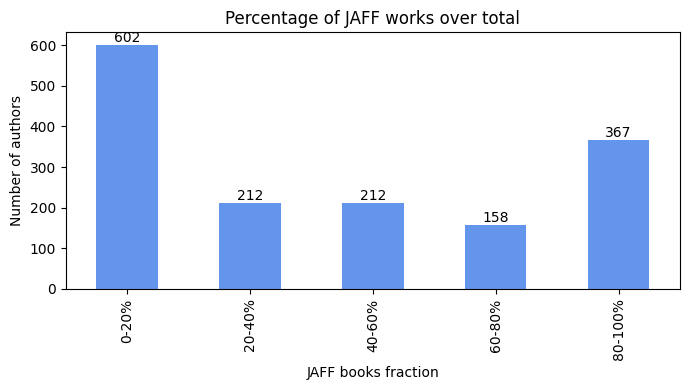

In [231]:
# Define bins and labels for grouping JAFF books counts into percentage intervals
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"]
df_multi['JAFF_bin'] = pd.cut(df_multi['JAFF_fraction'], bins=bins, labels=labels, include_lowest=True)
bin_counts = df_multi['JAFF_bin'].value_counts().sort_index()

plt.figure(figsize=(7,4))
ax = bin_counts.plot(kind='bar', color='cornflowerblue')
plt.ylabel('Number of authors')
plt.xlabel('JAFF books fraction')
plt.title('Percentage of JAFF works over total')
plt.tight_layout()

# Aggiungi il numero di autori sopra ogni barra
for i, value in enumerate(bin_counts):
    ax.text(i, value + 0.01, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

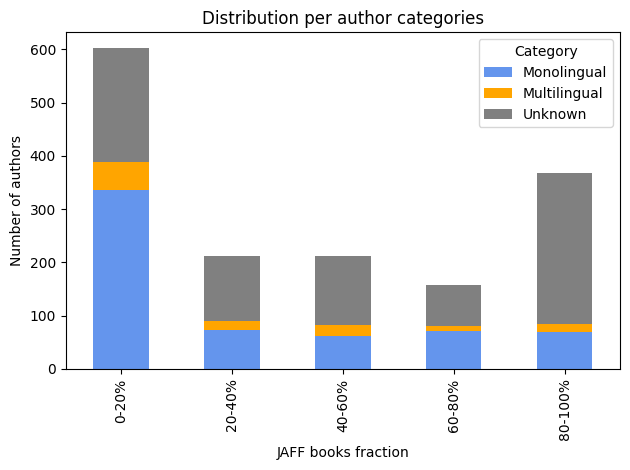

In [230]:
# Define distribution per author category: Multilingual / Monolingual / Unknown
df_multi['Category'] = 'Unknown'
df_multi.loc[df_multi['Multilingual'].astype(str).str.strip().str.lower() == 'x', 'Category'] = 'Multilingual'
# Assign 'Monolingual' only to authors with 'x' in 'Monolingual' and not marked as 'Multilingual'
df_multi.loc[
    (df_multi['Monolingual'].astype(str).str.strip().str.lower() == 'x') &
    (df_multi['Multilingual'].astype(str).str.strip().str.lower() != 'x'),
    'Category'
] = 'Monolingual'

# Stacked bar chart
distrib_language_type[['Monolingual', 'Multilingual', 'Unknown']].plot(
    kind='bar', stacked=True, color=['cornflowerblue', 'orange', 'grey']
)
plt.ylabel('Number of authors')
plt.xlabel('JAFF books fraction')
plt.title('Distribution per author categories')
plt.show()

# Variables leveraged from Metadata dataset:
## - genres
## - average rating, rating count, reviews count

In [201]:
# Import file
file_metadata = 'JAFF_METADATA.csv'

df_meta = pd.read_csv(file_metadata, delimiter=';')
df_meta.head()

,title,Author ID,author,average_rating,ratings_count,reviews_count,description,genres,pages_format,publication_info,ratings_histogram
0,A Body at Rest,1044699.0,Susan Petrone,4.12,26 ratings,4 reviews,"Martha and Nina are under-employed, over-educa...",['Fiction'],"268 pages, Paperback","First published January 1, 2009","['11 (42%)', '9 (34%)', '4 (15%)', '2 (7%)', '..."
1,Honour and Humility,1115836.0,Genevieve Rose Wimer,3.25,4 ratings,2 reviews,"A sequel to Jane Austen't 1813 novel ""Pride an...",[],"591 pages, Hardcover","Published January 1, 2002","['0 (0%)', '3 (75%)', '0 (0%)', '0 (0%)', '1 (..."
2,Jane Fairfax,1162310.0,Naomi Royde-Smith,0.00,0 ratings,0 reviews,NaN,[],"323 pages, Hardcover","First published January 1, 1940","['0 (0%)', '0 (0%)', '0 (0%)', '0 (0%)', '0 (0..."
3,For Darkness Shows the Stars,119848.0,Diana Peterfreund,3.87,"19,086 ratings","2,731 reviews",It's been several generations since a genetic ...,"['Young Adult', 'Dystopia', 'Romance', 'Scienc...","407 pages, Hardcover","First published June 12, 2012","['5,973 (31%)', '7,024 (36%)', '4,295 (22%)', ..."
4,Charlotte,1276006.0,Helen Moffett,3.69,"1,310 ratings",264 reviews,Everybody thinks that Charlotte Lucas has no p...,"['Historical Fiction', 'Fiction', 'Historical'...","368 pages, Hardcover","First published May 14, 2020","['254 (19%)', '542 (41%)', '392 (29%)', '95 (7..."


### Prepare 'average_rating', 'ratings_count', reviews_count' columns for analysis

In [202]:
# Extract the numeric value from the 'ratings_count' and 'reviews_count' columns, removing commas and dots
# for easier readability 
df['ratings_count_num'] = df['ratings_count'].astype(str)
df['ratings_count_num'] = df['ratings_count_num'].str.replace('.', '', regex=False)
df['ratings_count_num'] = df['ratings_count_num'].str.replace(',', '', regex=False)
# Finally convert into a number (float)
df['ratings_count_num'] = df['ratings_count_num'].astype(float) 

df['reviews_count_num'] = df['reviews_count'].astype(str)             
df['reviews_count_num'] = df['reviews_count_num'].str.replace('.', '', regex=False)  
df['reviews_count_num'] = df['reviews_count_num'].str.replace(',', '', regex=False)  
df['reviews_count_num'] = df['reviews_count_num'].astype(float)       

# Convert the 'average_rating' column to numeric values (float). 'errors="coerce"'sets non numerical values to NaN, im order to avoid errors
df_meta['average_rating_num'] = pd.to_numeric(df_meta['average_rating'], errors='coerce')


In [203]:
# Print statistical indicators
print("Average rating: mean", df_meta['average_rating_num'].mean())
print("                median", df_meta['average_rating_num'].median())
print("                std", df_meta['average_rating_num'].std())
print("Ratings count:  mean", df_meta['ratings_count_num'].mean())
print("                median", df_meta['ratings_count_num'].median())
print("                std", df_meta['ratings_count_num'].std())
print("Reviews count:  mean", df_meta['reviews_count_num'].mean())
print("                median", df_meta['reviews_count_num'].median())
print("                std", df_meta['reviews_count_num'].std())

Average rating: mean 3.346279877153158
                median 3.8
                std 1.308487413216948
Ratings count:  mean 562.165576178395
                median 40.0
                std 12191.049924902165
Reviews count:  mean 59.710108158632664
                median 6.0
                std 457.85232096806044


In [232]:
# Define bins and labels into intervals
bins = [0, 5, 10, 25, 50, 100, 200, 1000, 5000, 10000, 50000, 100000]
labels = ['0-5', '6-10', '11-25', '26-50', '51-100', '101-200', '201-1000', '1001-5000', '5001-10000', '10001-50000', '50001-100000']

# Assign values to bins 
ratings_bin = pd.cut(
    df_meta['ratings_count_num'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

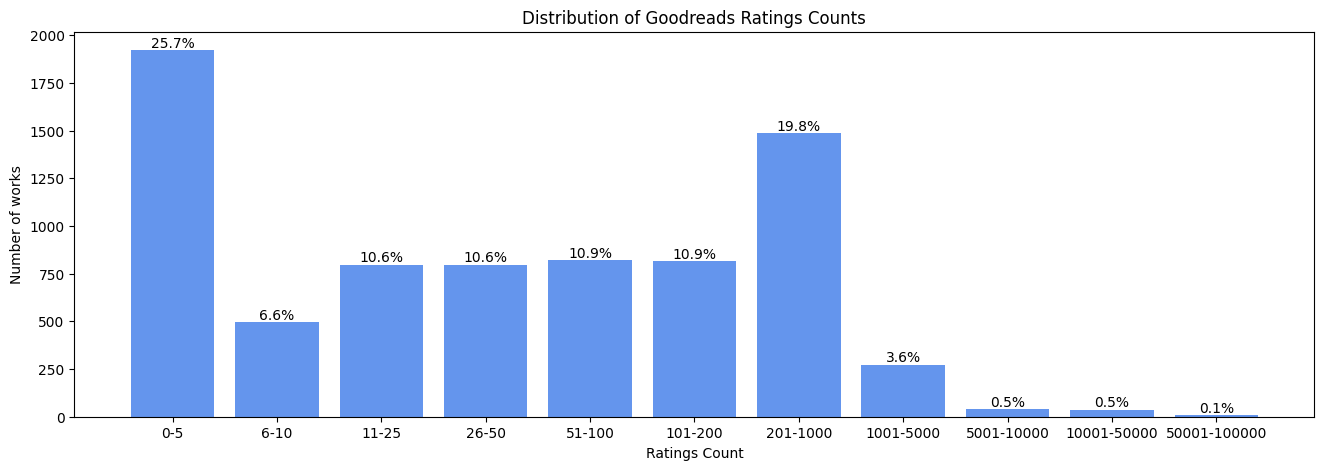

In [233]:
# Calculate values and percentages for each bin
counts = ratings_bin.value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Bar chart
plt.figure(figsize=(16,5))
bars = plt.bar(counts.index.astype(str), counts, color="cornflowerblue")
plt.xlabel('Ratings Count')
plt.ylabel('Number of works')
plt.title('Distribution of Goodreads Ratings Counts')
# Add percentages on top of bars
for bar, pct in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{pct:.1f}%',
        ha='center', va='bottom'
    )
plt.show()

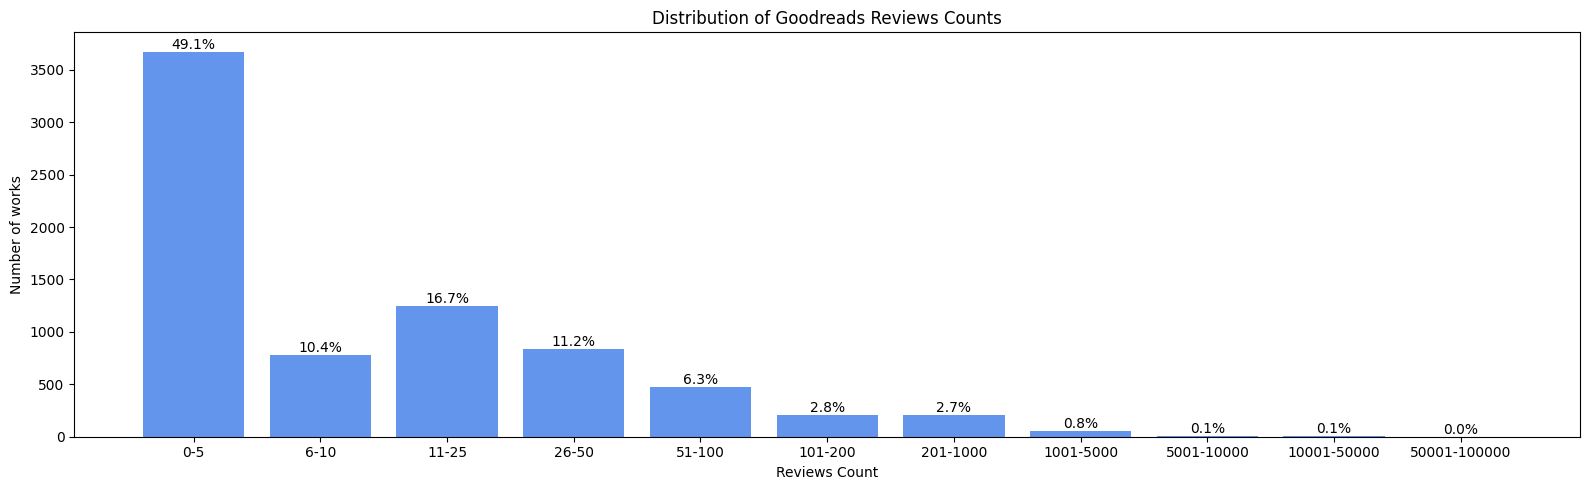

In [236]:
# Same for reviews count
bins = [0, 5, 10, 25, 50, 100, 200, 1000, 5000, 10000, 50000, 100000]
labels = [
    '0-5', '6-10', '11-25', '26-50', '51-100', '101-200',
    '201-1000', '1001-5000', '5001-10000', '10001-50000', '50001-100000'
]
reviews_bin = pd.cut(
    df_meta['reviews_count_num'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

counts_r = reviews_bin.value_counts().sort_index()
percentages_r = counts_r / counts_r.sum() * 100

plt.figure(figsize=(16,5))
bars_r = plt.bar(counts_r.index.astype(str), counts_r, color="cornflowerblue")
plt.xlabel('Reviews Count')
plt.ylabel('Number of works')
plt.title('Distribution of Goodreads Reviews Counts')
for bar, pct in zip(bars_r, percentages_r):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{pct:.1f}%',
        ha='center', va='bottom'
    )
plt.show()


### Prepare 'genres' column for analysis

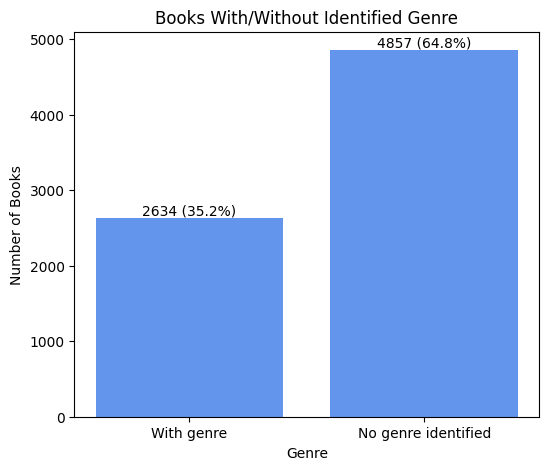

In [238]:
# First step: clean the genre column
# The function ensures all values in the cells are returned as a list, even strings that looks like a list 
import ast
def s_to_l(x):
    if isinstance(x, list):
        return x
    if isinstance(x, tuple):
        return list(x)
    if isinstance(x, str):
        x = x.strip()
        if x and x != "[]":
            try:
                return ast.literal_eval(x)
            except Exception:
                return []
        else:
            return []
    return []


# Apply function
df_meta['genres'] = df_meta['genres'].apply(s_to_l)
# if there is at least one genre
has_genre = df_meta['genres'].apply(lambda x: len(x) > 0)
# if the list is empty (no genre)
no_genre = df_meta['genres'].apply(lambda x: len(x) == 0)

# Bar chart
counts = [has_genre.sum(), no_genre.sum()]
labels = ['With genre', 'No genre identified']
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, counts, color='cornflowerblue')
plt.xlabel('Genre')  
plt.ylabel('Number of Books')       
plt.title('Books With/Without Identified Genre')
total = sum(counts)
# Add count and percentage above the bars 
for bar, value in zip(bars, counts):
    pct = value / total * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,          
        f'{value} ({pct:.1f}%)',
        ha='center', va='bottom'
    )
plt.show()

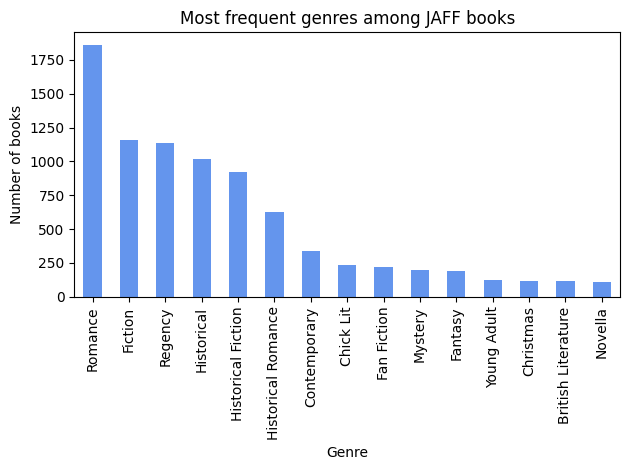

In [239]:
# Bar chart of most common genres
df_with_genre = df_meta[has_genre].explode('genres')
common_genres = [
    "Romance", "Historical Fiction", "Mystery", "Fiction", "Historical", "Young Adult",
    "Fantasy", "Regency", "Paranormal", "Historical Romance", "Chick Lit", "Contemporary",
    "Christmas", "Nonfiction", "Children's", "Crime", "Fan Fiction", "Novella", "British Literature"
]
df_with_genre = df_with_genre[df_with_genre['genres'].isin(common_genres)]
genre_counts = df_with_genre['genres'].value_counts()
genre_counts.plot(kind='bar', color='#6baed6')

genre_counts = df_with_genre['genres'].value_counts()
genre_counts.head(15).plot(kind='bar', color='cornflowerblue')
plt.ylabel('Number of books')
plt.xlabel('Genre')
plt.title('Most frequent genres among JAFF books')
plt.tight_layout()
plt.show()

# Variables leveraged from Editions dataset:
## - publication type (formats)
## - publisher types

In [215]:
df = 'JAFF_EDITIONS_FINAL_con_classificazione.csv'
df = pd.read_csv(df, delimiter=';')
df.head()

Index(['Title', 'Publication Date', 'Publisher', 'Format', 'Page Count',
       'Author', 'Author ID', 'ISBN', 'ASIN', 'Edition Language',
       'Average Rating', 'Rating Count', 'Book URL', 'Author_Type',
       'Self published', 'Small publishers', 'Big publishers'],
      dtype='object')

## Prepare 'Format' column

In [107]:
# Identify valid formats
df['Book Format'] = df['Format'].str.extract(r'(Kindle Edition|Paperback|Hardcover|Audible Audio|Audiobook|Large Print|Large Print edition|Illustrated|Unabridged|Large type/Large print|Large Print|ebook|Unknown Binding|Other edition)',
    expand=False)


# Normalize synonyms/variants
df['Book Format'] = df['Book Format'].replace({
    'Audible Audio': 'Audiobook',
    'Audible': 'Audiobook',
    'Large Print': 'Large print',
    'Large Print edition': 'Large print',
    'Large type/Large print': 'Large print'
})

# Mark any missing or mislocated value as 'Unknown'
df['Book Format'] = df['Book Format'].fillna('Unknown')


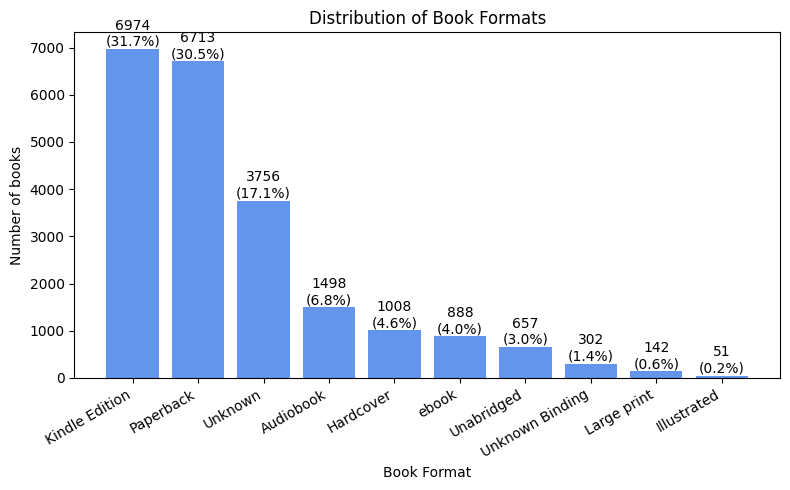

In [211]:
format_counts = df['Book Format'].value_counts()
total = format_counts.sum()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(format_counts.index, format_counts, color='cornflowerblue')

# Add counts and percentages above the bars
for bar, count in zip(bars, format_counts):
    height = bar.get_height()
    percent = count / total * 100
    ax.annotate(f'{int(count)}\n({percent:.1f}%)', 
                xy=(bar.get_x() + bar.get_width()/2, height), 
                ha='center', va='bottom')

plt.title('Distribution of Book Formats')
plt.ylabel('Number of books')
plt.xlabel('Book Format')
plt.xticks(rotation=30, ha='right')
plt.show()

## Adjust 'Publisher type' column for analysis

In [249]:
# Define the classification function
def classify_publisher(row):
    if row['Big publishers'] == 'Y':
        return 'Big Publishers'
    elif row['Small publishers'] == 'Y':
        return 'Small Publishers'
    elif row['Self published'] == 'Y':
        return 'Self-Published'
    else:
        return 'Unknown'  

df['publisher_type'] = df.apply(classify_publisher, axis=1)

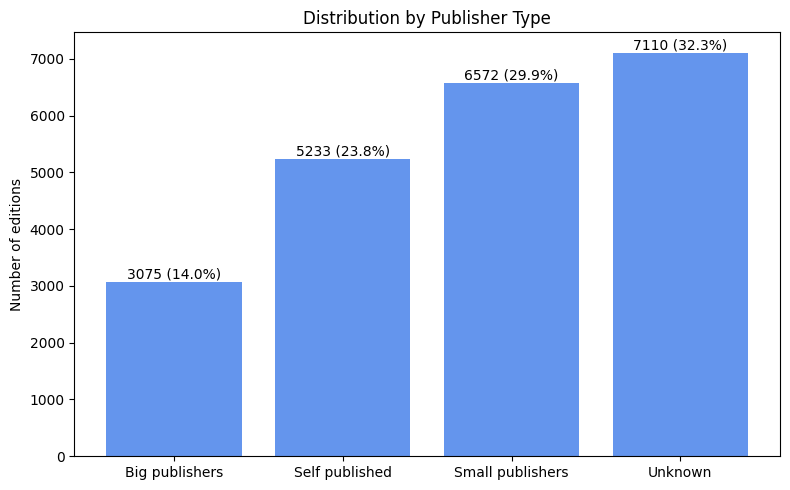

In [212]:
counts = df['publisher_type'].value_counts().to_dict()
# Count how many values per category
total = sum(counts.values())
labels = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8,5))
bars = plt.bar(labels, values, color='cornflowerblue')
plt.ylabel('Number of editions')
plt.title('Distribution by Publisher Type')
plt.tight_layout()

# Add counts and percentages for each bar
for bar, value in zip(bars, values):
    pct = value / total * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,  # Move values above the bar
        f"{value} ({pct:.1f}%)",
        ha='center', va='bottom'
    )

plt.show()